# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [8]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_per_year = sfo_data[["housing_units"]]
mean_housing_units = housing_units_per_year.groupby('year').mean()
print(mean_housing_units)

      housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242


In [9]:
# Save the dataframe as a csv file
mean_housing_units.to_csv('mean_housing_units.csv')

In [21]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
mean_housing_units.hvplot.bar(title="Housing Units in San Francisco from 2010 to 2016", ylim=(370000, 387500)).opts(yformatter="%.0f")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart


:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average sale price per square foot and average gross rent
gross_rent = sfo_data[["gross_rent"]]
gross_rent_units = gross_rent.groupby('year').mean()

sqt_foot = sfo_data[["sale_price_sqr_foot"]]
sqt_foot_units = sqt_foot.groupby('year').mean()

print(gross_rent_units)

print(sqt_foot_units)


      gross_rent
year            
2010        1239
2011        1530
2012        2324
2013        2971
2014        3528
2015        3739
2016        4390
      sale_price_sqr_foot
year                     
2010           369.344353
2011           341.903429
2012           399.389968
2013           483.600304
2014           556.277273
2015           632.540352
2016           697.643709


In [22]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
gross_rent_line = gross_rent_units.hvplot.line(title="Average Gross Rent by Year") + sqt_foot_units.hvplot.line("Average Price per SqFt by Year")


# Line chart for average montly rent
gross_rent_line

:Layout
   .Curve.I  :Curve   [year]   (gross_rent)
   .Curve.II :Curve   [Average Price per SqFt by Year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [14]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [15]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood.hvplot.line(
    x="year",
    y="sale_price_sqr_foot",
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Average Price per SqFt by Year",
    ylim=(100, 800))

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [16]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood.hvplot.line(
    x="year",
    y="gross_rent",
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Average Gross Rent by Year",
    ylim=(800, 4750))

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [17]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_sales = sfo_data.groupby(["neighborhood"], as_index=False).mean()
top_ten = neighborhood_sales.nlargest(10, "sale_price_sqr_foot").round(2)
top_ten

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,903.99,377427.50,2555.17
36,Merced Heights,788.84,380348.00,3414.00
38,Miraloma Park,779.81,375967.25,2155.25
51,Pacific Heights,689.56,378401.00,2817.29
71,Westwood Park,687.09,382295.00,3959.00
63,Telegraph Hill,676.51,378401.00,2817.29
57,Presidio Heights,675.35,378401.00,2817.29
10,Cow Hollow,665.96,378401.00,2817.29
56,Potrero Hill,662.01,378401.00,2817.29
60,South Beach,650.12,375805.00,2099.00


In [18]:
# Plotting the data from the top 10 expensive neighborhoods

top_ten.hvplot.bar(x="neighborhood",
                   y="sale_price_sqr_foot",
                   rot=60,
                   title="Top 10 Most Expensive Neighborhoods in SFO",
                   xlabel="Neighborhood",
                   ylabel="Avg. Sale Price per Square Foot",
                   ylim=(100, 1000))

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [19]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
neighborhood.head()



sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [41]:
# Plotting the data from the top 10 expensive neighborhoods

neighborhood.hvplot.bar(
    x="year",
    y=["gross_rent","sale_price_sqr_foot"],
    groupby="neighborhood",
    xlabel="Year/Neighborhood",
    ylabel="Num Housing Units",
    rot=60,
    title="Comparing Cost to Purchase vs Rental Income")

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [92]:
# Load neighborhoods coordinates data


file_path_coord = Path("../Pythonic_Monopoly/Data/neighborhoods_coordinates.csv")
coordinate_data = pd.read_csv(file_path_coord)
coordinate_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [93]:
# Calculate the mean values for each neighborhood
avg_neighborhood = sfo_data.groupby(["neighborhood"]).mean()
avg_neighborhood.reset_index(inplace=True)
avg_neighborhood.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [96]:
# Join the average values with the neighborhood locations
avg_locations = pd.concat([coordinate_data, avg_neighborhood], axis="columns", join="inner")
avg_locations.drop(columns="neighborhood", inplace=True)
avg_locations.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

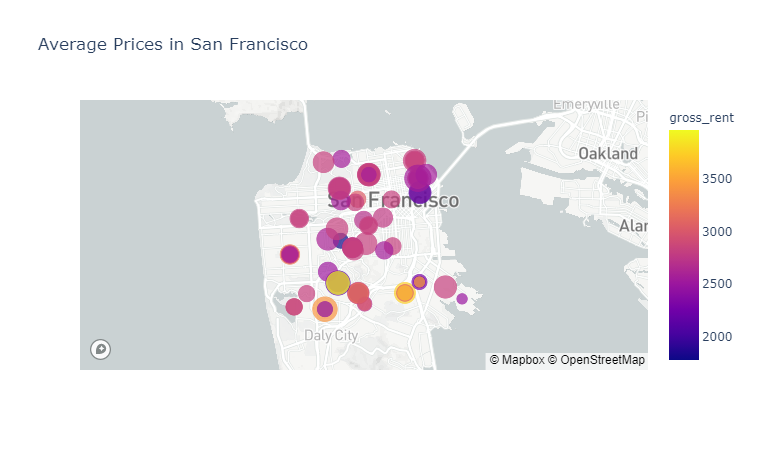

In [116]:
# Set the mapbox access token
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    avg_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=10,
    title="Average Prices in San Francisco"
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


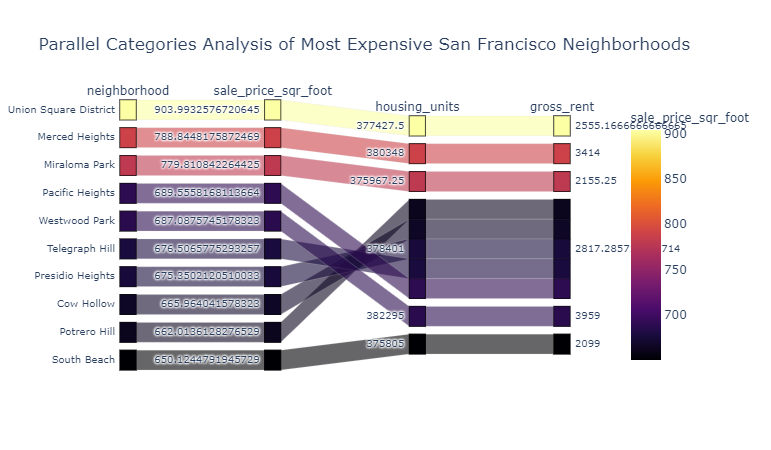

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

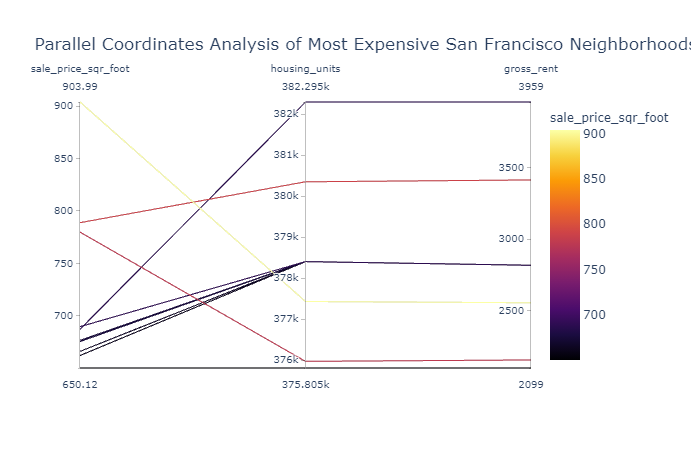

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

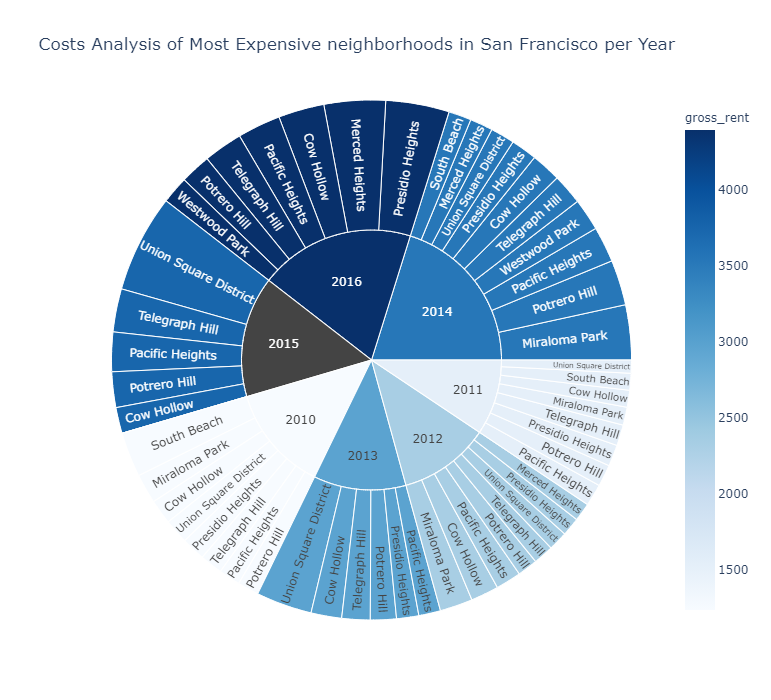

In [23]:
# Sunburst Plot
# YOUR CODE HERE!